Analyze 13/76 neq switching without repartitioning

In [1]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd
import tqdm
import warnings
warnings.filterwarnings('ignore')
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole
import pandas as pd
import pickle

In [2]:
def analyze(forward_accumulated, reverse_accumulated): 
    # Compute dg, ddg
    dg, ddg = pymbar.bar.BAR(forward_accumulated, reverse_accumulated)
    return dg, ddg

def analyze_bootstrap(d_works):
    d_dgs_phase = {}
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    d_dgs_phase['complex'] = (complex_dg, complex_ddg)
    d_dgs_phase['apo'] = (apo_dg, apo_ddg)
    
    binding_dg = complex_dg - apo_dg
#     binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
    return d_dgs_phase, binding_dg
    
def plot(forward_work, reverse_work, dg, ddg, dir_num, phase, output_dir, title):
    # Substract offset
    print("subtracting offset")
    forward_work_offset = []
    for cycle in forward_work:
        forward_work_offset.append(np.array([val - cycle[0] for val in cycle[1:]]))
    forward_work_offset = np.array(forward_work_offset)

    reverse_work_offset = []
    for cycle in reverse_work:
        reverse_work_offset.append(np.array([val - cycle[0] for val in cycle[1:]]))
    reverse_work_offset = np.array(reverse_work_offset)

    # Plot work trajectories
    print("plotting work trajs")
    for cycle in forward_work_offset:
        x = [(i+1)*4e-4 for i in range(len(list(cycle)))]
        y = cycle
        plt.plot(x, y, color=sns.color_palette()[0])
    for cycle in reverse_work_offset:
        x = [(i+1)*4e-4 for i in range(len(list(cycle)))]
        y = -cycle
        plt.plot(x, y, color=sns.color_palette()[1])
    plt.xlabel("$t_{neq}$ (ns)")
    plt.ylabel("work (kT)")
    plt.title(f"{title} {phase}")
    plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_traj.png"), dpi=500)
    print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_traj.png')}")
    plt.clf()
    
    # Plot work distributions
    print("plotting work distrib")
    accumulated_forward = [cycle[-1] for cycle in forward_work_offset]
    accumulated_reverse = [-cycle[-1] for cycle in reverse_work_offset]
    sns.distplot(accumulated_forward)
    sns.distplot(accumulated_reverse)
    plt.axvline(dg)
    plt.axvline(dg + ddg, linestyle='dashed')
    plt.axvline(dg - ddg, linestyle='dashed')
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.title(f"{title} {phase}")
    plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
    print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
    plt.clf()
    

## A39D

In [6]:
# Load data into dicts and plot 
titles = ["D39A", "A39D"]
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
d_input = {}
dir_num = 13
forward = 74
reverse = 76
for i in tqdm_notebook([forward, reverse]):
    print(f"dir: {i}")
    d_works = {"complex": {}, "apo":{}}
    d_combined_works = {"complex": {}, "apo":{}}
    for phase in phases:
        for direction in directions:
            all_arrays = []
            for j in range(100):
                print(f"job: {j}")
                path = f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{i}/{i}_{phase}_{j}_{direction}.npy"
                if os.path.exists(path):
                    with open(path, 'rb') as f:
                        array = np.load(f)
                        all_arrays.append(array)
                        print(array.shape)
            if all_arrays:
                combined = np.concatenate(all_arrays)
                accumulated = np.array([cycle[-1] - cycle[0] for cycle in combined])
                combined = np.array([cycle[0::100] for cycle in combined])
                d_combined_works[phase][direction] = combined
                d_works[phase][direction] = accumulated
    
    d_input[i] = d_works
    
    # Plot
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    index = 0 if i == 74 else 1
    plot(d_combined_works['complex']['forward'], d_combined_works['complex']['reverse'], complex_dg, complex_ddg, i, 'complex', os.path.dirname(path), titles[index])
    plot(d_combined_works['apo']['forward'], d_combined_works['apo']['reverse'], apo_dg, apo_ddg, i, 'apo', os.path.dirname(path), titles[index])
        

dir: 74
job: 0
(1, 500001)
job: 1
(1, 500001)
job: 2
(1, 500001)
job: 3
(1, 500001)
job: 4
(1, 500001)
job: 5
(1, 500001)
job: 6
(1, 500001)
job: 7
(1, 500001)
job: 8
(1, 500001)
job: 9
(1, 500001)
job: 10
(1, 500001)
job: 11
(1, 500001)
job: 12
(1, 500001)
job: 13
(1, 500001)
job: 14
(1, 500001)
job: 15
(1, 500001)
job: 16
(1, 500001)
job: 17
(1, 500001)
job: 18
(1, 500001)
job: 19
(1, 500001)
job: 20
(1, 500001)
job: 21
job: 22
(1, 500001)
job: 23
(1, 500001)
job: 24
(1, 500001)
job: 25
(1, 500001)
job: 26
(1, 500001)
job: 27
(1, 500001)
job: 28
(1, 500001)
job: 29
(1, 500001)
job: 30
(1, 500001)
job: 31
(1, 500001)
job: 32
(1, 500001)
job: 33
(1, 500001)
job: 34
(1, 500001)
job: 35
(1, 500001)
job: 36
(1, 500001)
job: 37
(1, 500001)
job: 38
(1, 500001)
job: 39
(1, 500001)
job: 40
(1, 500001)
job: 41
(1, 500001)
job: 42
(1, 500001)
job: 43
(1, 500001)
job: 44
(1, 500001)
job: 45
(1, 500001)
job: 46
(1, 500001)
job: 47
(1, 500001)
job: 48
(1, 500001)
job: 49
(1, 500001)
job: 50
(1, 50

saved to: /data/chodera/zhangi/perses_benchmark/neq/13/74/74_apo_work_dist.png
dir: 76
job: 0
(1, 1000001)
job: 1
(1, 1000001)
job: 2
(1, 1000001)
job: 3
(1, 1000001)
job: 4
(1, 1000001)
job: 5
(1, 1000001)
job: 6
(1, 1000001)
job: 7
(1, 1000001)
job: 8
(1, 1000001)
job: 9
(1, 1000001)
job: 10
(1, 1000001)
job: 11
(1, 1000001)
job: 12
(1, 1000001)
job: 13
(1, 1000001)
job: 14
(1, 1000001)
job: 15
(1, 1000001)
job: 16
(1, 1000001)
job: 17
(1, 1000001)
job: 18
(1, 1000001)
job: 19
(1, 1000001)
job: 20
(1, 1000001)
job: 21
(1, 1000001)
job: 22
(1, 1000001)
job: 23
(1, 1000001)
job: 24
(1, 1000001)
job: 25
(1, 1000001)
job: 26
(1, 1000001)
job: 27
(1, 1000001)
job: 28
(1, 1000001)
job: 29
(1, 1000001)
job: 30
(1, 1000001)
job: 31
(1, 1000001)
job: 32
(1, 1000001)
job: 33
(1, 1000001)
job: 34
(1, 1000001)
job: 35
(1, 1000001)
job: 36
(1, 1000001)
job: 37
(1, 1000001)
job: 38
(1, 1000001)
job: 39
(1, 1000001)
job: 40
(1, 1000001)
job: 41
(1, 1000001)
job: 42
(1, 1000001)
job: 43
(1, 1000001)

subtracting offset
plotting work trajs
saved to: /data/chodera/zhangi/perses_benchmark/neq/13/76/76_complex_work_traj.png
plotting work distrib
saved to: /data/chodera/zhangi/perses_benchmark/neq/13/76/76_complex_work_dist.png
subtracting offset
plotting work trajs
saved to: /data/chodera/zhangi/perses_benchmark/neq/13/76/76_apo_work_traj.png
plotting work distrib
saved to: /data/chodera/zhangi/perses_benchmark/neq/13/76/76_apo_work_dist.png



<Figure size 432x288 with 0 Axes>

In [ ]:
# Bootstrap works
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_phase = {}
ddgs = {}
for i in [forward, reverse]:
    dgs_phase_all = []
    ddgs_all = []
    for _ in tqdm_notebook(range(N_bootstraps)):
        # Initialize data structure for works
        d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}

        # Save subsampled works
        for phase in phases:
            for direction in directions:
                work_array = np.array(d_input[i][phase][direction])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction] = work_array[subsample_indices]
        d_dgs_phase, binding_dg = analyze_bootstrap(d_works)
        dgs_phase_all.append(d_dgs_phase)
        ddgs_all.append(binding_dg)
    dgs_phase[i] = dgs_phase_all
    ddgs[i] = ddgs_all
    
    


In [ ]:
# Plot ddgs
sns.distplot(ddgs[forward], rug=True, label=titles[0])
sns.distplot(np.array(ddgs[reverse])*-1, rug=True, label=titles[1])

In [7]:
forward_ddg = np.mean(ddgs[forward])
forward_ci = np.percentile(ddgs[forward], 2.5), np.percentile(ddgs[forward], 97.5)
reverse_ddg = np.mean(ddgs[reverse])
reverse_ci = np.percentile(ddgs[reverse], 2.5), np.percentile(ddgs[reverse], 97.5)
negative_reverse_ci = sorted(np.array(reverse_ci)*-1)
discrepancy = tuple(np.array(forward_ci) - np.array(negative_reverse_ci))
output_kt = [forward_ddg, forward_ci, reverse_ddg, reverse_ci, discrepancy]
output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL]), round(reverse_ddg*KT_KCALMOL, 2), tuple([round(val, 2) for val in np.array(reverse_ci)*KT_KCALMOL]), tuple([round(val, 2) for val in np.array(discrepancy)*KT_KCALMOL])]

In [8]:
output_kcalmol

[14.47, (13.19, 15.52), -11.17, (-11.68, -10.62), (2.57, 3.84)]

In [9]:
dir_num

13

In [10]:
pd.DataFrame([output_kcalmol]).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/analysis_{titles[0]}_{titles[1]}.csv")

In [11]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/dgs_phase.pickle", "wb") as f:
    pickle.dump(dgs_phase, f)
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/ddgs.pickle", "wb") as f:
    pickle.dump(ddgs, f)

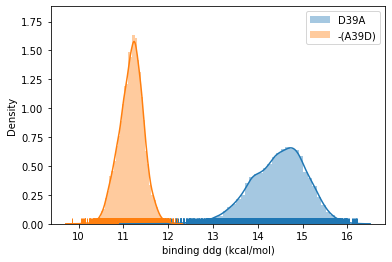

In [12]:
# Plot ddgs
sns.distplot(np.array(ddgs[forward])*KT_KCALMOL, rug=True, label=titles[0])
sns.distplot(np.array(ddgs[reverse])*-KT_KCALMOL, rug=True, label=f"-({titles[1]})")
plt.xlabel("binding ddg (kcal/mol)")
plt.legend()

## Extract traj

In [15]:
import mdtraj as md
import pickle
import os
import numpy as np
from simtk import unit

Forward traj

In [16]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/73/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_0_forward_neq_new.npy"), "rb") as f:
    pos_forward_new = np.load(f)
    

In [17]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [30]:
# Write PDB file using openmm bc it will include box vectors
from simtk.openmm import app
app.PDBFile.writeFile(htf._topology_proposal.new_topology, pos_forward_new[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [31]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [38]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [60]:
traj = md.Trajectory(pos_forward_new, md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [61]:
traj

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, without unitcells at 0x2afb89b94210>

In [63]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [64]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, and unitcells at 0x2afb9ae97cd0>

In [59]:
traj.save(os.path.join(outdir, f"{i}_{phase}_0_forward_neq_new.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_0_forward_neq_new.pdb"))

Reverse traj

In [69]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/73/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_0_reverse_neq_new.npy"), "rb") as f:
    pos_reverse_new = np.load(f)
    

In [66]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [30]:
# Write PDB file using openmm bc it will include box vectors
# from simtk.openmm import app
# app.PDBFile.writeFile(htf._topology_proposal.new_topology, pos_forward_new[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [67]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [68]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [70]:
traj = md.Trajectory(pos_reverse_new, md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [71]:
traj

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, without unitcells at 0x2afb92939f50>

In [72]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [73]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, and unitcells at 0x2afb92939a10>

In [74]:
traj.save(os.path.join(outdir, f"{i}_{phase}_0_reverse_neq_new.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_0_reverse_neq_new.pdb"))

In [75]:
l = [566, 604, 605, 606, 607, 610, 618, 620, 622, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 29474, 29475, 29476, 29477, 29478, 29479, 638, 639, 643, 644, 672, 674, 677, 681, 685, 1840, 1850, 1851, 1852, 1853, 2519, 2674, 3005, 3014]
for atom in htf.hybrid_topology.atoms:
    if atom.index in l:
        print(atom)

ASP35-O
TRP38-N
TRP38-CA
TRP38-C
TRP38-O
TRP38-CD1
TRP38-H
TRP38-HB3
TRP38-HD1
ALA39-N
ALA39-CA
ALA39-C
ALA39-O
ALA39-CB
ALA39-H
ALA39-HA
ALA39-HB3
ALA39-HB2
ALA39-HB1
ALA39-CB
ALA39-HB3
ALA39-HB2
ALA39-CG
ALA39-OD1
ALA39-OD2
ALA40-N
ALA40-CA
ALA40-H
ALA40-HA
THR42-OG1
THR42-H
THR42-HG1
GLY43-N
GLY43-H
LYS27-NZ
LYS27-HE2
LYS27-HZ3
LYS27-HZ1
LYS27-HZ2
GLU73-OE2
ARG83-HH11
TYR103-OH
TYR103-HH


In [76]:
l2 = [565,
 566,
 575,
 576,
 577,
 578,
 581,
 585,
 587,
 588,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 612,
 618,
 619,
 620,
 621,
 622,
 623,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 29474,
 29475,
 29476,
 29477,
 29478,
 29479,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 646,
 648,
 656,
 667,
 668,
 669,
 671,
 672,
 673,
 674,
 676,
 677,
 678,
 680,
 681,
 682,
 683,
 685,
 686,
 688,
 1839,
 1840,
 1847,
 1849,
 1850,
 1851,
 1852,
 1853,
 2517,
 2518,
 2519,
 2663,
 2674,
 2675,
 2676,
 2734,
 3002,
 3004,
 3005,
 3012,
 3014]

In [77]:
for atom in htf.hybrid_topology.atoms:
    if atom.index in l2 and atom.index not in l:
        print(atom)

ASP35-C
ALA36-N
ALA36-CA
ALA36-C
ALA36-O
ALA36-HA
LEU37-N
LEU37-C
LEU37-O
TRP38-CB
TRP38-CG
TRP38-NE1
TRP38-HA
TRP38-HB2
TRP38-HE1
ALA40-C
ALA40-O
ALA40-CB
ALA40-HB2
LEU41-N
LEU41-H
THR42-N
THR42-CA
THR42-C
THR42-CB
THR42-CG2
THR42-HB
THR42-HG21
THR42-HG23
GLY43-CA
GLY43-C
GLY43-HA3
TRP44-N
LYS27-CE
LYS27-HD3
LYS27-HE3
GLU73-CD
GLU73-OE1
ARG83-NH1
ARG83-HH12
ARG83-HH21
ARG87-HE
TYR103-CE1
TYR103-CZ
TYR103-HE1
